# Prediksi nutrisi tanaman PT Aria

# 1. Perkenala

Nama: Sri Wahyuni

Hacktiv8: FTDS-16

# 2. Import Libraries

Pada project kali ini saya akan menggunakan library **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **Scikit-Learn** 

In [83]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
from sklearn.model_selection import train_test_split, cross_val_score

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# Model Regression 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge

# Evaluate Regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [84]:
# Data Loading

df = pd.read_excel(r'aria_data.xlsx')
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [85]:
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


In [86]:
# Menduplicate Dataset
df_duplicate = df.copy()

In [87]:
# Mengecek Informasi Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


Pada dataset ini terdiri dari:
- 10 Kolom
- 160 Baris
- 9 tipe data float dan 1 tipe data object
- Tidak ada missing values

In [88]:
# Mengecek Statistik Deskriptif

df.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


# 4. Exploratory Data Analysis (EDA)

## 4.1 Target

In [89]:
# Function untuk distribusi data

# Histogram
def distribusi_data(df, variable):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(df[variable], kde=True, bins=25)
    plt.title('Histogram')

#Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

# Skewness
    print('\n Skewness Value : ', df[variable].skew())

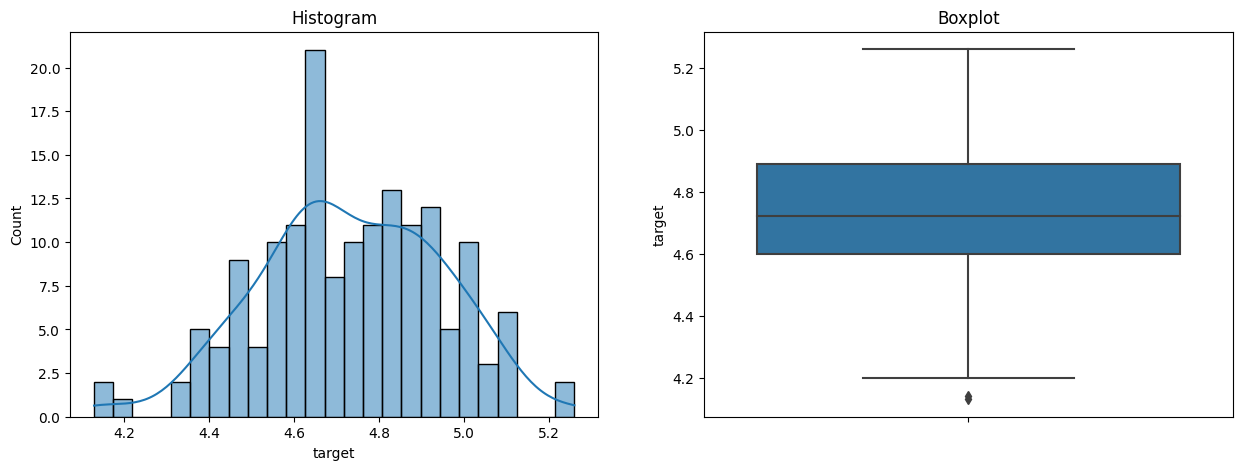


 Skewness Value :  -0.15828173643344287


In [90]:
# Cek distribusi target

distribusi_data(df, 'target')

## 4.2 v1 - v8

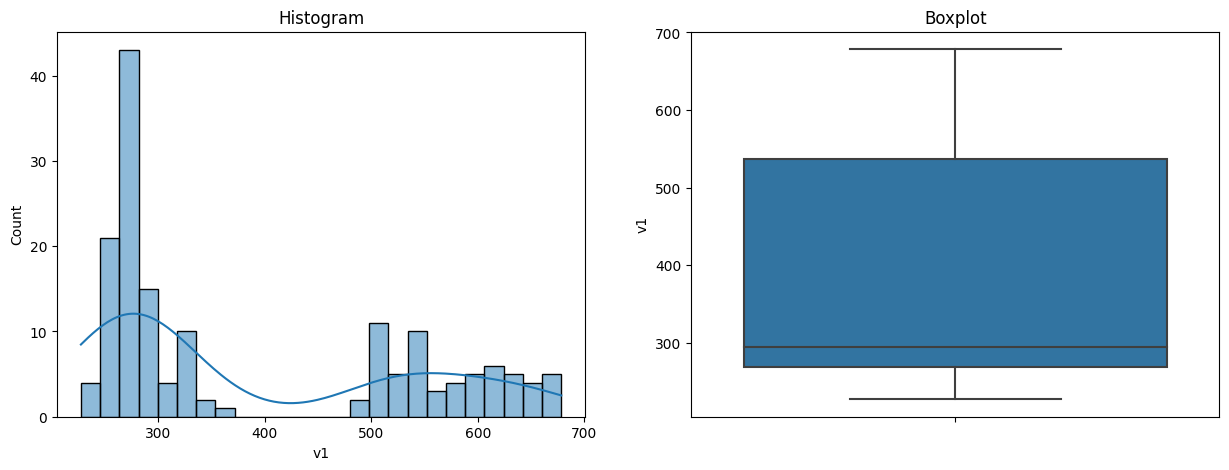


 Skewness Value :  0.6399112607855549


In [91]:
# v1

distribusi_data(df, 'v1')

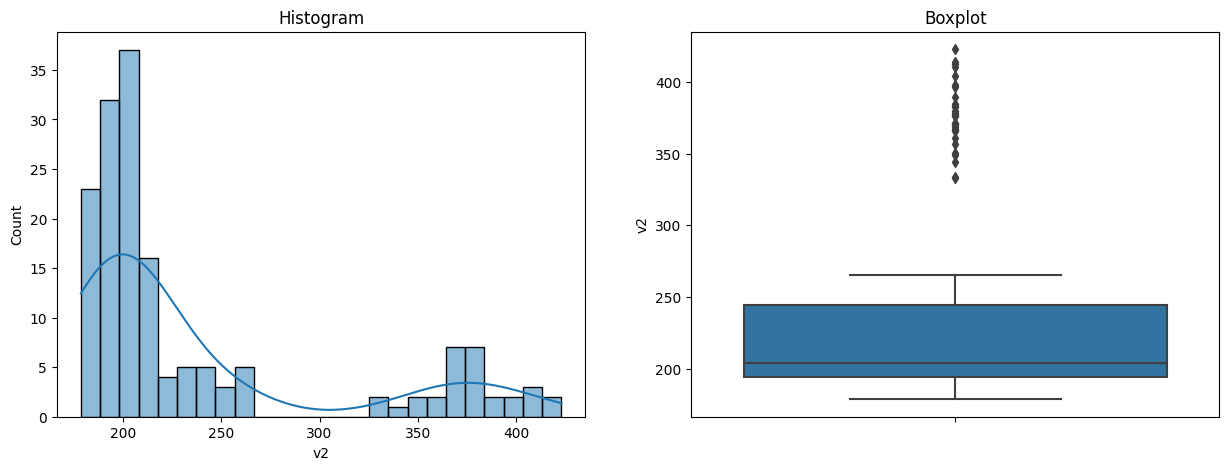


 Skewness Value :  1.4617281099191999


In [92]:
# v2

distribusi_data(df, 'v2')

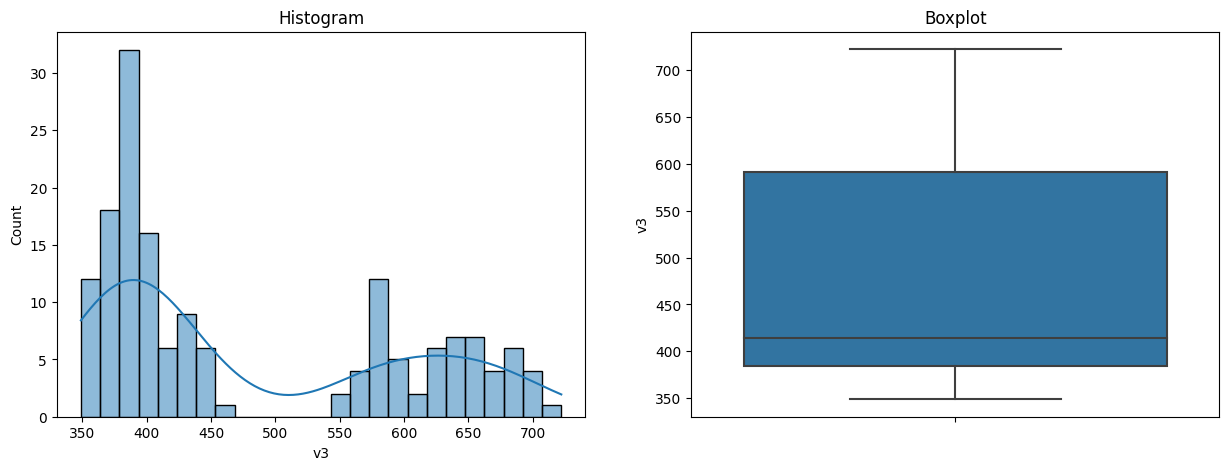


 Skewness Value :  0.6026551795688342


In [93]:
# v3

distribusi_data(df, 'v3')

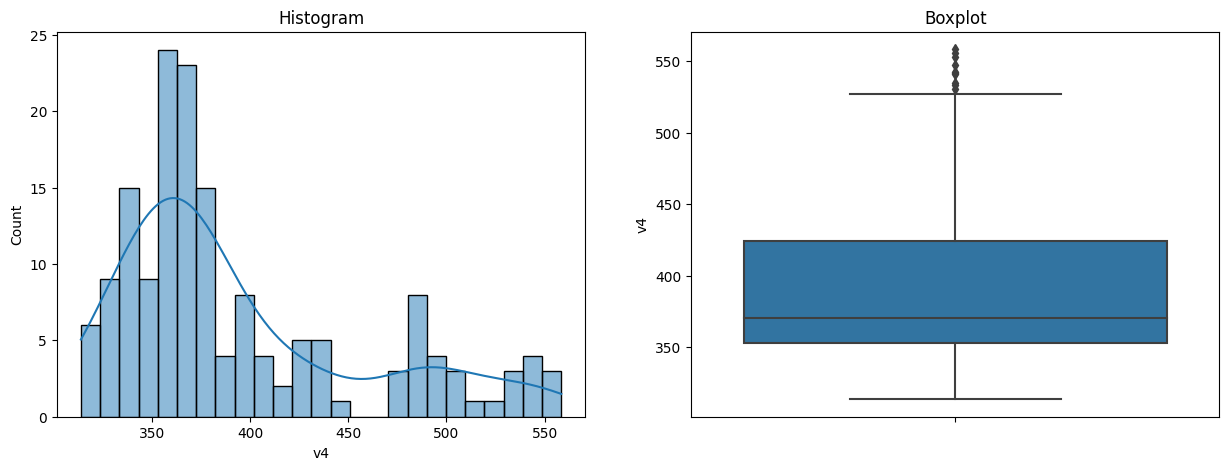


 Skewness Value :  1.1436931932699348


In [94]:
# v4

distribusi_data(df, 'v4')

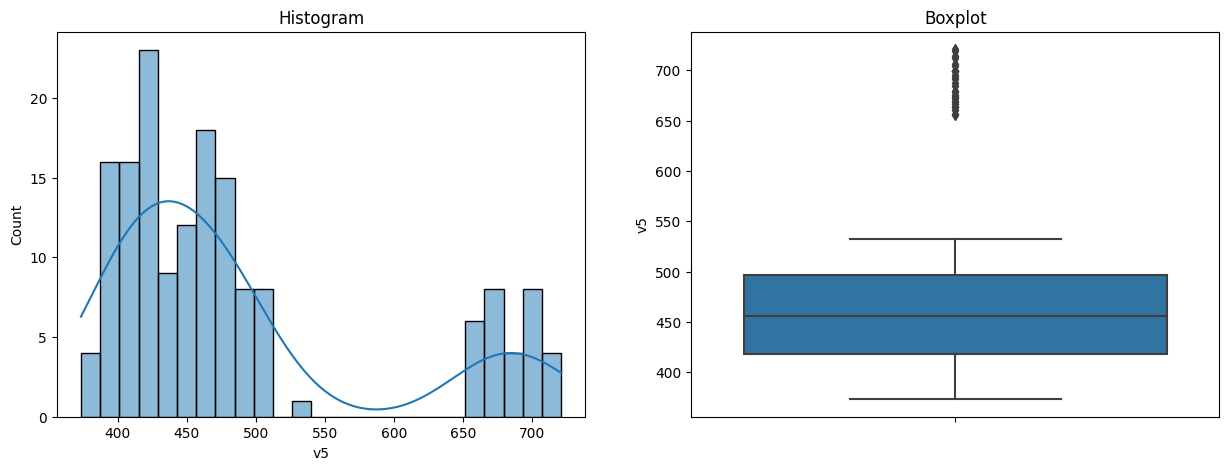


 Skewness Value :  1.2706398850462628


In [95]:
# v5

distribusi_data(df, 'v5')

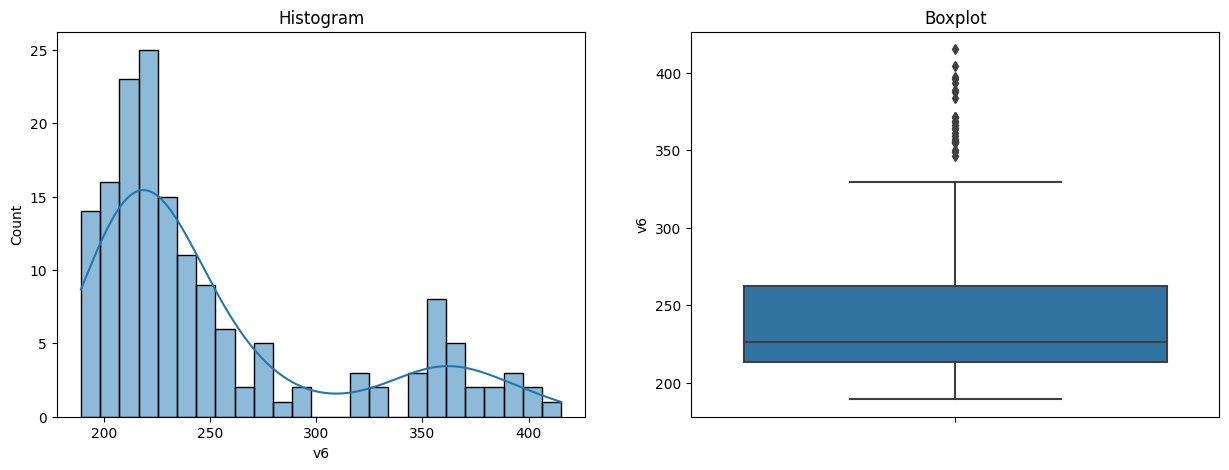


 Skewness Value :  1.2954833782360857


In [96]:
# v6

distribusi_data(df, 'v6')

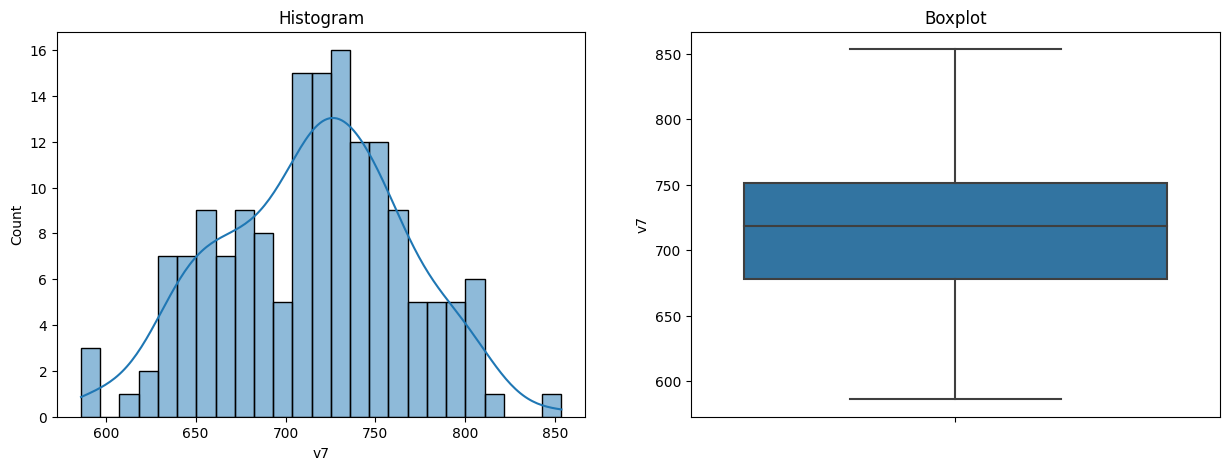


 Skewness Value :  -0.10723483952914095


In [97]:
# v7

distribusi_data(df, 'v7')

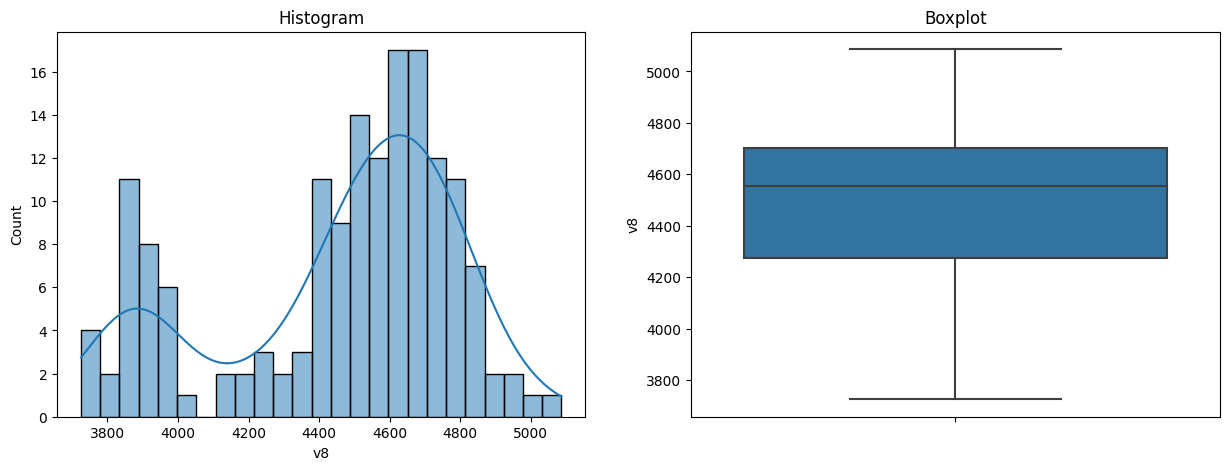


 Skewness Value :  -0.7664435142947442


In [98]:
# v8

distribusi_data(df, 'v8')

## 4.3 Sample type

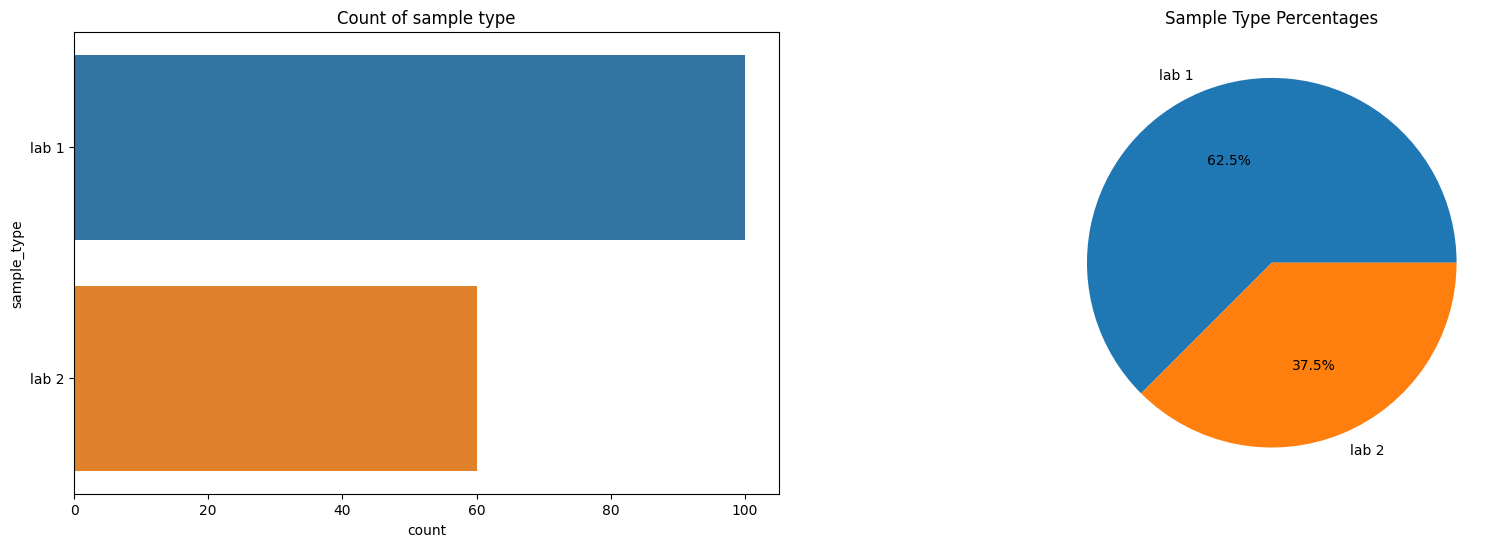

In [99]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(y='sample_type', data=df)
plt.title('Count of sample type')
plt.subplot(1,2,2)
plt.pie(df.groupby('sample_type').size(), labels=df.groupby('sample_type').size().index, autopct='%1.1f%%')
plt.title('Sample Type Percentages')
plt.show()

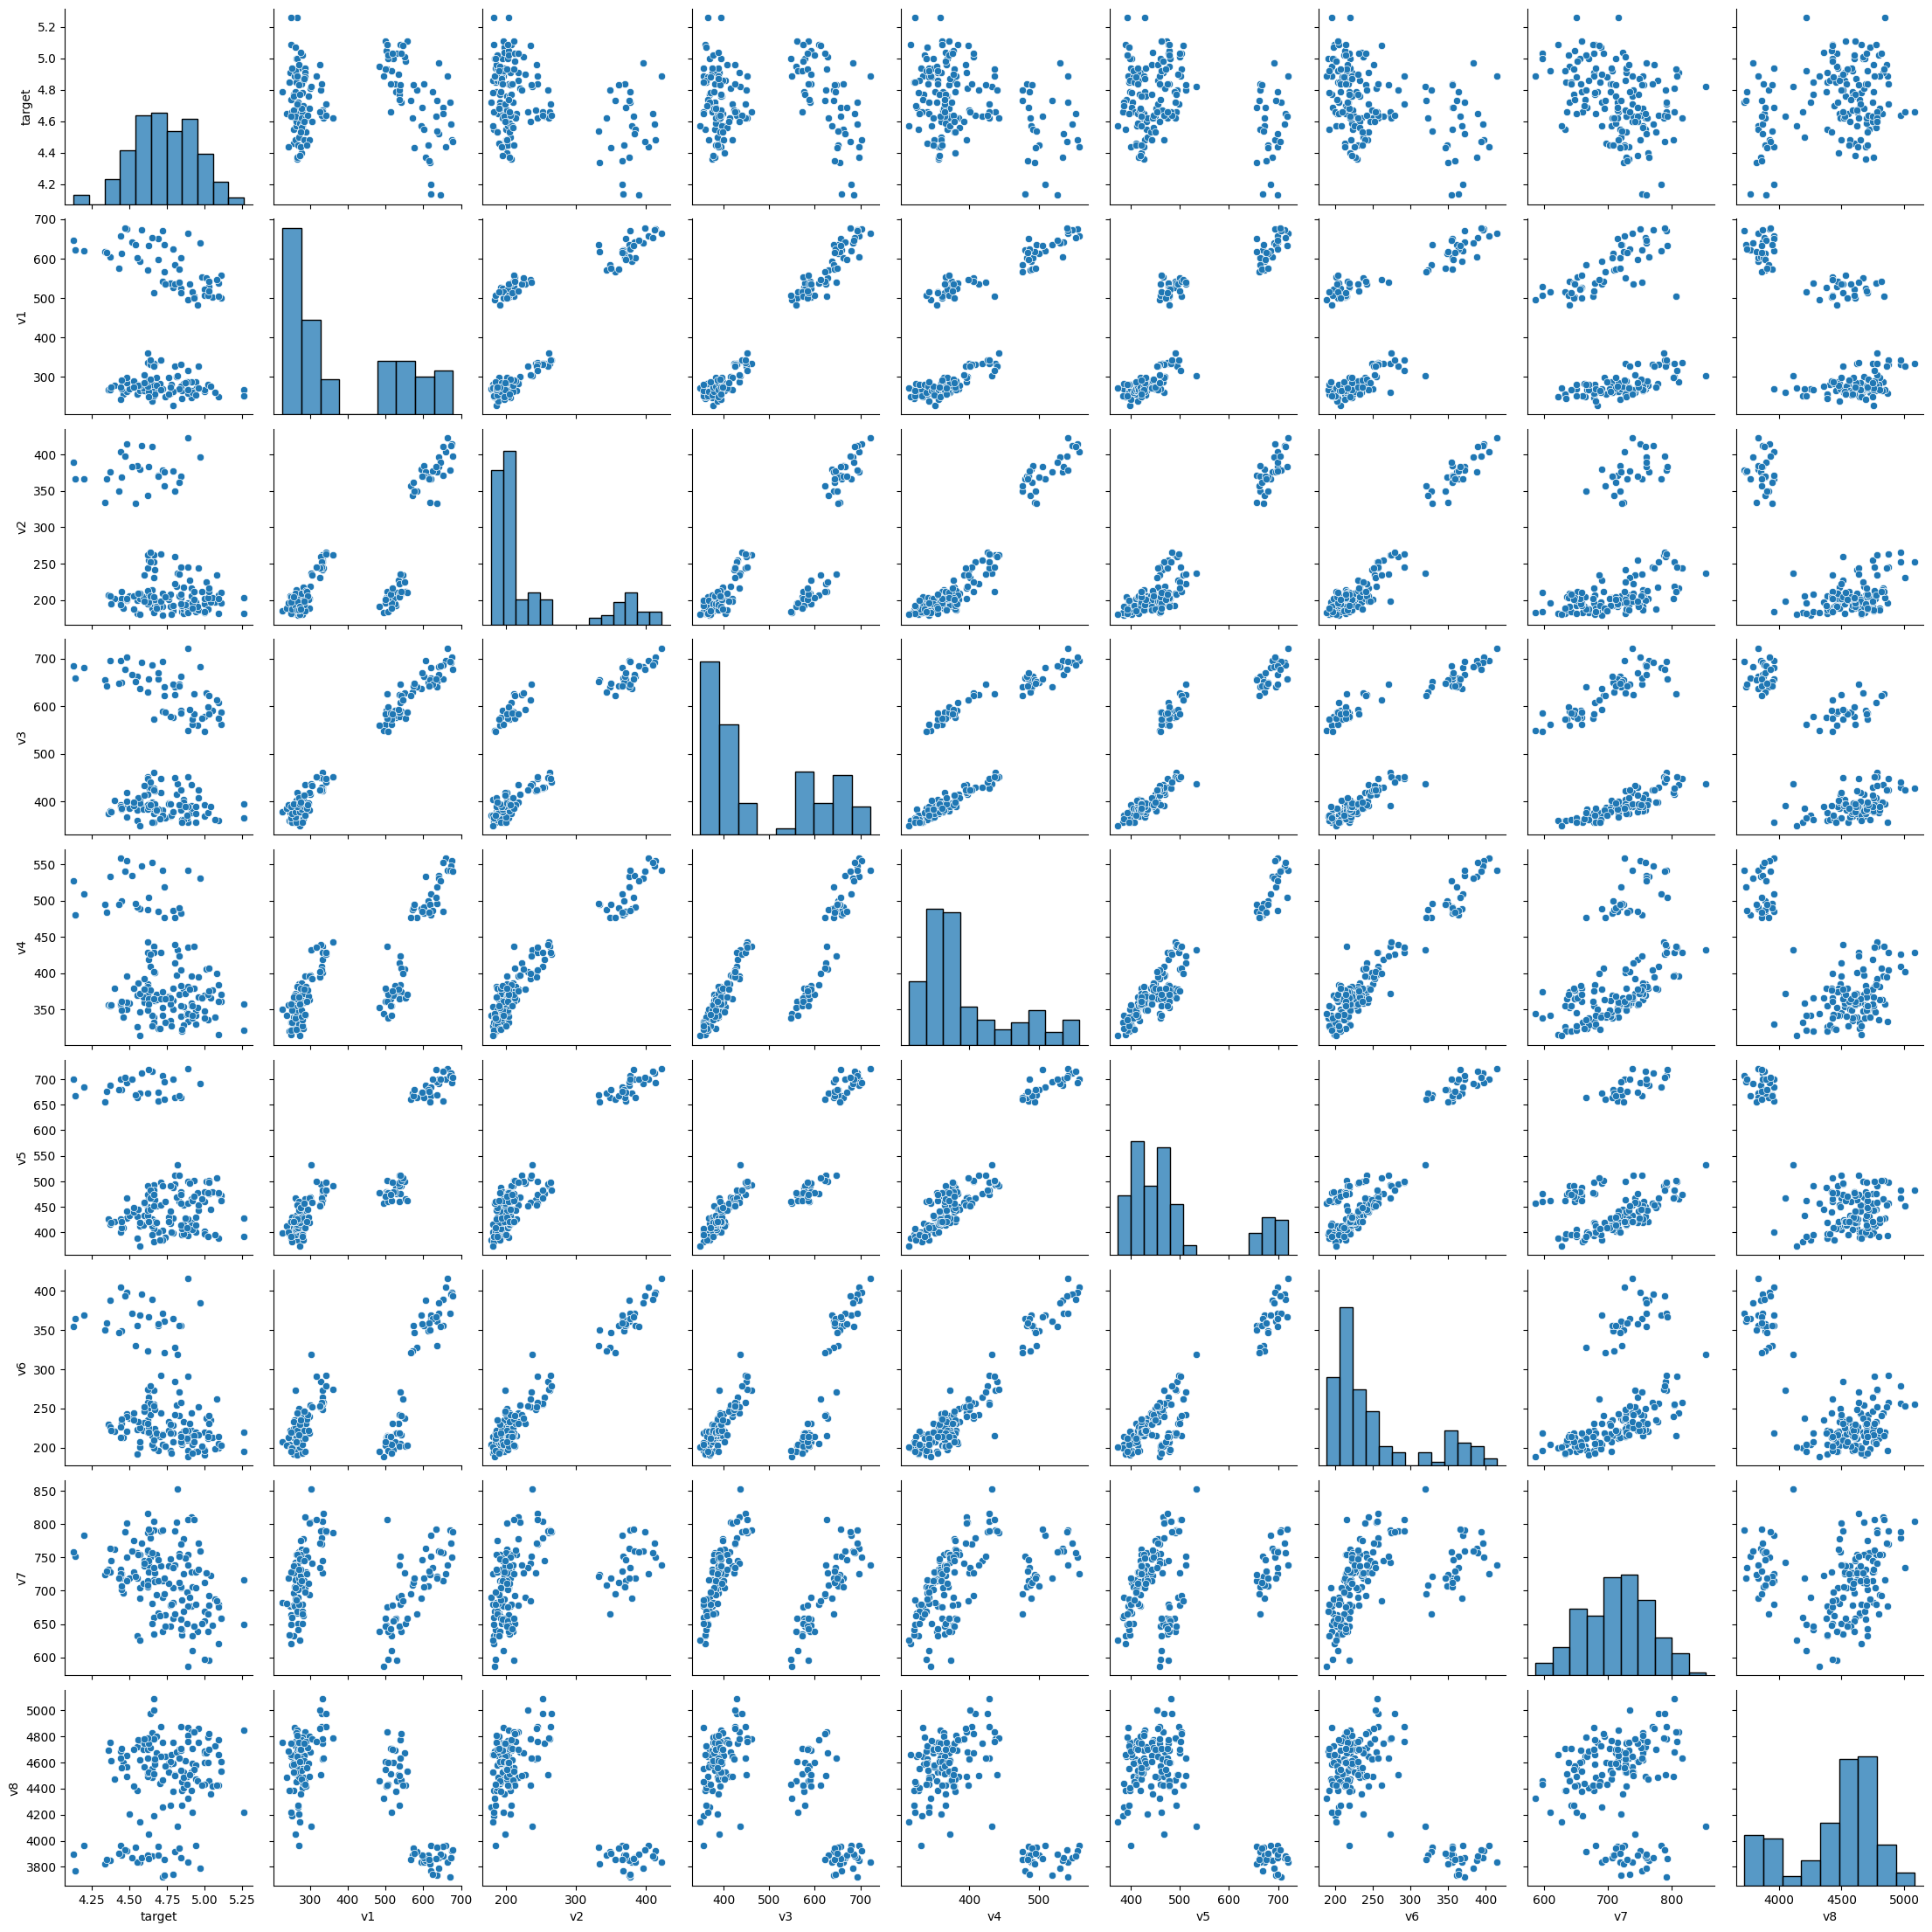

In [100]:
sns.pairplot(df)

feature terhadap target sangat bervariasi dan tidak memiliki gubungan liear, namun feature dengan feauter cenderung memiliki hubungan linear makan akan menggunakan beberapa model, data juga cenderung tidak normal atau right skew

# 5. Preprocessing

## Feature selection

<AxesSubplot: >

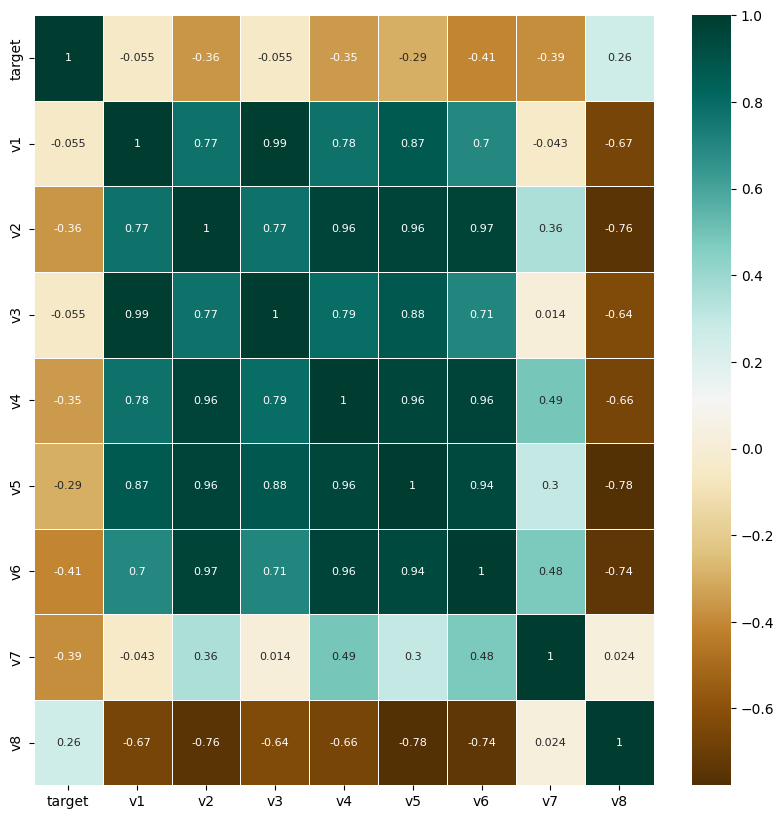

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'),
                cmap = 'BrBG',
                linewidths= .5,
                annot = True,
                annot_kws={'size':8})

Korelasi feature terhadap target masih cukup kecil dan paling banyak korelasi negatif, dari hasil tersebut feature yang akan digunakan v2, v4, v5, v6, v7, v8

In [102]:
df = df.drop('sample_type', axis=1)

## Model Inference

In [103]:
# Mendapatkan model inference

df_inf = df.sample(5, random_state=23)
df_inf

,target,v1,v2,v3,v4,v5,v6,v7,v8
148,4.73,635.933333,376.400000,640.400000,519.266667,695.533333,361.066667,719.466667,3738.466667
109,4.84,525.333333,195.066667,591.866667,382.733333,478.600000,207.466667,657.200000,4690.600000
75,4.63,250.187500,197.000000,389.375000,358.000000,421.562500,219.750000,728.250000,4747.312500
107,4.66,514.125000,205.000000,573.375000,364.562500,474.937500,209.750000,635.562500,4509.500000
18,5.26,266.533333,203.000000,393.933333,358.000000,428.400000,219.666667,715.800000,4848.133333


In [104]:
# Menghapus data inference dari dataset

df_train_test = df.drop(df_inf.index)

In [105]:
# Meriset nomor index

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

## Handling outlier

Pada saat exploratory data outlier terdapat pada feature **target**, **v2**, **v4**, **v5** dan **v6**. Outlier akan di handling dengan cara sebagai berikut:
- jika outlier < 5% maka akan dihapus
- jika outlier >= 5% dan outlier < 15% maka akan dilakukan capping
- jika outlier >= 15% maka akan dibiarkan

In [106]:
def upper_lower(df_train_test, col):
    IQR = df_train_test[col].quantile(0.75) - df_train_test[col].quantile(0.25)
    upper_bound = df_train_test[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df_train_test[col].quantile(0.25) - 1.5 * IQR
    return df_train_test[(df_train_test[col] > lower_bound) & (df_train_test[col] < upper_bound)]

In [107]:
cols = ['target', 'v2', 'v4', 'v5', 'v6']
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(df_train_test, cols[i]).shape[0] / df_train_test.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,target,98.71
1,v2,81.29
2,v4,94.84
3,v5,81.29
4,v6,83.87


Dari perhitungan diatas outlier percenetage sangat tinggi atau banyak, dan penulis **tidak memiliki data pendukung** alasan mengapa banyak terdapat outlier. Maka, outlier akan dibiarkan.

## Handling missing values

In [108]:
# Cek missing values
df_train_test.isnull().sum()

target    0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
dtype: int64

## Splitting data

Pada bagian ini dataset akan dipisah antara training dan testing dengan perbandingan **8:2**, dimana:
- **80%** data training 
- **20%** data testing

Sebelumnya akan memisahkan antara data target (X) dan feature (y)

In [109]:
# Splitting data X dan y

X = df_train_test.drop('target', axis=1)
y = df_train_test['target']

In [110]:
# Splitting Train set dan Test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=50)

print('Train Size :', X_train.shape)
print('Test size :', X_test.shape)

Train Size : (124, 8)
Test size : (31, 8)


In [111]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Categorical Columns :  []


In [112]:
#X_train_num = X_train[num_columns]
#X_test_num = X_test[num_columns]

#X_train_cat = X_train[cat_columns]
#X_test_cat = X_test[cat_columns]

## Feature scalling

Pada bagian ini akan dilakukan scalling dengan MinMaxScaler karena data ada yang tidak terdistribusi normal sehingga akan di normalisasi

In [113]:
# Making feature scaling for numerical columns
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_num_scaled = scaler.transform(X_train)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train.columns, index = X_train.index)
X_train_num_scaled.head()

,v1,v2,v3,v4,v5,v6,v7,v8
148,0.929116,0.864163,0.898997,0.881753,0.937872,0.732766,0.646956,0.132777
90,0.230612,0.301265,0.214438,0.393364,0.271033,0.298663,0.721541,0.974527
59,0.135629,0.109011,0.114629,0.268743,0.192330,0.241701,0.533184,0.541382
81,0.104741,0.034151,0.130163,0.273429,0.217833,0.206035,0.707335,0.764537
72,0.139472,0.142069,0.118021,0.279217,0.203643,0.184813,0.652695,0.810169


In [114]:
# X_test_num
X_test_num_scaled = scaler.transform(X_test)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test.columns, index = X_test.index)
X_test_num_scaled.head()

,v1,v2,v3,v4,v5,v6,v7,v8
39,0.094553,0.090467,0.174599,0.293877,0.219080,0.269095,0.645989,0.598745
73,0.086655,0.032068,0.108145,0.280699,0.151306,0.147507,0.629850,0.845600
20,0.047999,0.013882,0.029304,0.007821,0.046500,0.045816,0.129522,0.730068
16,0.087487,0.017468,0.052906,0.102140,0.070050,0.009340,0.310566,0.752216
38,0.122919,0.158462,0.130877,0.266538,0.233365,0.193361,0.717565,0.594211


# 6. Model Definition

In [115]:
# Defining Linear Regression
linreg = LinearRegression()

# lasso
lasso = Lasso(alpha=0.1)

# Define the Ridge Regressor
ridge = Ridge(alpha=10)

# Defining Random Forest Regressor
rf = RandomForestRegressor(random_state=23)

# create decision tree model
dt = DecisionTreeRegressor()

svr = SVR(kernel='rbf')

# 7. Model Training

In [116]:
%timeit linreg.fit(X_train_num_scaled, y_train)
%timeit lasso.fit(X_train_num_scaled, y_train)
%timeit ridge.fit(X_train_num_scaled, y_train)
%timeit rf.fit(X_train_num_scaled, y_train)
%timeit dt.fit(X_train_num_scaled, y_train)
%timeit svr.fit(X_train_num_scaled, y_train)

2.27 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.17 ms ± 385 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.63 ms ± 664 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 5.82 times longer than the fastest. This could mean that an intermediate result is being cached.
292 ms ± 250 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.1 ms ± 242 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.68 ms ± 386 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 8. Model Evaluation

## 8.1 Linear regressi

In [117]:

# Predicting target (y_train) with linear regression
y_pred_train_linreg = linreg.predict(X_train_num_scaled)
y_pred_train_linreg = pd.DataFrame(y_pred_train_linreg, columns=['Target Predicted (Train)'], index=X_train_num_scaled.index).sort_index()

In [118]:
# Checking actual target y_train
y_train = pd.DataFrame(y_train).sort_index()

In [119]:
# Predicting target (y_test) with linear regression
y_pred_test_linreg = linreg.predict(X_test_num_scaled)
y_pred_test_linreg = pd.DataFrame(y_pred_test_linreg, columns=['Target Predicted (Test)'], index=X_test_num_scaled.index).sort_index()  

In [120]:

# Checking actual target y_test_linreg
y_test = pd.DataFrame(y_test).sort_index()

In [121]:
# Model Evaluation using RMSE (Root Mean Squared Error)
print('Root Mean Squared Error (RMSE) Train Set: ', np.sqrt(mean_squared_error(y_train, y_pred_train_linreg)))
print('Root Mean Squared Error (RMSE) Test Set: ', np.sqrt(mean_squared_error(y_test, y_pred_test_linreg)))

Root Mean Squared Error (RMSE) Train Set:  0.18004940119291896
Root Mean Squared Error (RMSE) Test Set:  0.16584976046607658


In [122]:
# Model Evaluation using r2 Score
print('r2 Score Train Set: ', round(r2_score(y_train, y_pred_train_linreg)*100, 2),'%')
print('r2 Score Test Set: ', round(r2_score(y_test, y_pred_test_linreg)*100, 2),'%')

r2 Score Train Set:  31.08 %
r2 Score Test Set:  25.63 %


## 8.2 Lasso

In [123]:
# Predicting target (y_train) with linear regression
y_pred_train_lasso = lasso.predict(X_train_num_scaled)
y_pred_train_lasso = pd.DataFrame(y_pred_train_lasso, columns=['Target Predicted (Train)'], index=X_train_num_scaled.index).sort_index()

# Checking actual target y_train
y_train_lasso= pd.DataFrame(y_train).sort_index()

In [124]:
# Predicting target (y_test) with linear regression
y_pred_test_lasso = lasso.predict(X_test_num_scaled)
y_pred_test_lasso = pd.DataFrame(y_pred_test_lasso, columns=['Target Predicted (Test)'], index=X_test_num_scaled.index).sort_index() 

# Checking actual target y_test_lasso
y_test_lasso = pd.DataFrame(y_test).sort_index()

In [125]:
# Model Evaluation using RMSE (Root Mean Squared Error)
print('Root Mean Squared Error (RMSE) Train Set: ', np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)))
print('Root Mean Squared Error (RMSE) Test Set: ', np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))

Root Mean Squared Error (RMSE) Train Set:  0.21687941474723457
Root Mean Squared Error (RMSE) Test Set:  0.19232435531747666


In [126]:
# Model Evaluation using r2 Score
print('r2 Score Train Set: ', round(r2_score(y_train, y_pred_train_lasso)*100, 2),'%')
print('r2 Score Test Set: ', round(r2_score(y_test, y_pred_test_lasso)*100, 2),'%')

r2 Score Train Set:  0.0 %
r2 Score Test Set:  -0.0 %


## 8.3 Ridge

In [127]:
# Predicting target (y_train) with linear regression
y_pred_train_ridge = ridge.predict(X_train_num_scaled)
y_pred_train_ridge = pd.DataFrame(y_pred_train_ridge, columns=['Target Predicted (Train)'], index=X_train_num_scaled.index).sort_index()

# Checking actual target y_train
y_train_ridge = pd.DataFrame(y_train).sort_index()

In [128]:
# Predicting target (y_test) with linear regression
y_pred_test_ridge = ridge.predict(X_test_num_scaled)
y_pred_test_ridge = pd.DataFrame(y_pred_test_ridge, columns=['Target Predicted (Test)'], index=X_test_num_scaled.index).sort_index() 

# Checking actual target y_test_ridge
y_test_ridge = pd.DataFrame(y_test).sort_index()

In [129]:
# Model Evaluation using RMSE (Root Mean Squared Error)
print('Root Mean Squared Error (RMSE) Train Set: ', np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)))
print('Root Mean Squared Error (RMSE) Test Set: ', np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)))

Root Mean Squared Error (RMSE) Train Set:  0.1914406444385215
Root Mean Squared Error (RMSE) Test Set:  0.16074313283453423


In [130]:
# Model Evaluation using r2 Score
print('r2 Score Train Set: ', round(r2_score(y_train, y_pred_train_ridge)*100, 2),'%')
print('r2 Score Test Set: ', round(r2_score(y_test, y_pred_test_ridge)*100, 2),'%')

r2 Score Train Set:  22.08 %
r2 Score Test Set:  30.14 %


## 8.2 Random Forest

In [131]:
# Predicting target (y_train) with linear regression
y_pred_train_rf = rf.predict(X_train_num_scaled)
y_pred_train_rf = pd.DataFrame(y_pred_train_rf, columns=['Target Predicted (Train)'], index=X_train_num_scaled.index).sort_index()

In [132]:
# Checking actual target y_train
y_train_rf = pd.DataFrame(y_train).sort_index()

In [133]:
# Predicting target (y_test) with linear regression
y_pred_test_rf = rf.predict(X_test_num_scaled)
y_pred_test_rf = pd.DataFrame(y_pred_test_rf, columns=['Target Predicted (Test)'], index=X_test_num_scaled.index).sort_index()

# Checking actual target y_test_rf
y_test_rf = pd.DataFrame(y_test).sort_index()


In [134]:
# Model Evaluation using RMSE (Root Mean Squared Error)
print('Root Mean Squared Error (RMSE) Train Set: ', np.sqrt(mean_squared_error(y_train, y_pred_train_rf)))
print('Root Mean Squared Error (RMSE) Test Set: ', np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))

Root Mean Squared Error (RMSE) Train Set:  0.07281997964490149
Root Mean Squared Error (RMSE) Test Set:  0.1613643552997085


In [135]:
# Model Evaluation using r2 Score
print('r2 Score Train Set: ', round(r2_score(y_train_rf, y_pred_train_rf)*100, 2),'%')
print('r2 Score Test Set: ', round(r2_score(y_test_rf, y_pred_test_rf)*100, 2),'%')

r2 Score Train Set:  88.73 %
r2 Score Test Set:  29.6 %


## 8.2 Decision tree

In [136]:
# Predicting target (y_train) with linear regression
y_pred_train_dt = dt.predict(X_train_num_scaled)
y_pred_train_dt = pd.DataFrame(y_pred_train_dt, columns=['Target Predicted (Train)'], index=X_train_num_scaled.index).sort_index()

In [137]:
# Checking actual target y_train
y_train_dt = pd.DataFrame(y_train).sort_index()

In [138]:
# Predicting target (y_test) with linear regression
y_pred_test_dt = dt.predict(X_test_num_scaled)
y_pred_test_dt = pd.DataFrame(y_pred_test_dt, columns=['Target Predicted (Test)'], index=X_test_num_scaled.index).sort_index()

# Checking actual target y_test_dt
y_test_dt = pd.DataFrame(y_test).sort_index()

In [139]:
# Model Evaluation using RMSE (Root Mean Squared Error)
print('Root Mean Squared Error (RMSE) Train Set: ', np.sqrt(mean_squared_error(y_train, y_pred_train_dt)))
print('Root Mean Squared Error (RMSE) Test Set: ', np.sqrt(mean_squared_error(y_test, y_pred_test_dt)))

Root Mean Squared Error (RMSE) Train Set:  0.0
Root Mean Squared Error (RMSE) Test Set:  0.23551590590761345


In [140]:
# Model Evaluation using r2 Score
print('r2 Score Train Set: ', round(r2_score(y_train_dt, y_pred_train_dt)*100, 2),'%')
print('r2 Score Test Set: ', round(r2_score(y_test_dt, y_pred_test_dt)*100, 2),'%')

r2 Score Train Set:  100.0 %
r2 Score Test Set:  -49.96 %


## 8.6 SVR

In [141]:
# Predicting target (y_train) with SVR
y_pred_train_svr = svr.predict(X_train_num_scaled)
y_pred_train_svr = pd.DataFrame(y_pred_train_svr, columns=['Target Predicted (Train)'], index=X_train_num_scaled.index).sort_index()

In [142]:
# Checking actual target y_train
y_train_svr = pd.DataFrame(y_train).sort_index()

In [143]:
# Predicting target (y_test) with SVR
y_pred_test_svr = svr.predict(X_test_num_scaled)
y_pred_test_svr = pd.DataFrame(y_pred_test_svr, columns=['Target Predicted (Test)'], index=X_test_num_scaled.index).sort_index()

In [144]:
# Checking actual target y_test
y_test_svr = pd.DataFrame(y_test).sort_index()

In [145]:
# Model Evaluation using RMSE (Root Mean Squared Error)
print('Root Mean Squared Error (RMSE) Train Set: ', np.sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('Root Mean Squared Error (RMSE) Test Set: ', np.sqrt(mean_squared_error(y_test, y_pred_test_svr)))

Root Mean Squared Error (RMSE) Train Set:  0.16164168552994268
Root Mean Squared Error (RMSE) Test Set:  0.16324744599063287


In [146]:
# Model Evaluation using r2 Score
print('r2 Score Train Set: ', round(r2_score(y_train_svr, y_pred_train_svr)*100, 2),'%')
print('r2 Score Test Set: ', round(r2_score(y_test_svr, y_pred_test_svr)*100, 2),'%')

r2 Score Train Set:  44.45 %
r2 Score Test Set:  27.95 %


Pada data ini, Root Mean Square Error (RMSE) pada data train disemua model cenderung lebih kecil dibanding dengan data test. sama halnya dengan r2 score pada saat train hasilnya lebih besar dibandingkan saat test sehingga model yang dibuat overfitting, salah satu faktor penyebabnya karena data terlalu sedikit, kurang bervariasi, dan banyaknya outlier.

# 9. Model Saving

In [162]:
# Save the Files

import joblib
import json

with open('scaler.pkl', 'wb') as file_3:
  joblib.dump(scaler, file_3)

with open('num_columns.txt', 'w') as file_2:
  json.dump(num_columns, file_2)

with open('rf.pkl', 'wb') as file_1:
  joblib.dump(rf, file_1)

In [165]:
# Load All Files

import joblib
import json

with open('rf.pkl', 'rb') as file_1:
  model_rf = joblib.load(file_1)

with open('scaler.pkl', 'rb') as file_3:
  model_scaler = joblib.load(file_3)

with open('num_columns.txt', 'r') as file_2:
  list_num_cols = json.load(file_2)

# 10. Model Inference

In [149]:
df_inf

,target,v1,v2,v3,v4,v5,v6,v7,v8
0,4.73,635.933333,376.400000,640.400000,519.266667,695.533333,361.066667,719.466667,3738.466667
1,4.84,525.333333,195.066667,591.866667,382.733333,478.600000,207.466667,657.200000,4690.600000
2,4.63,250.187500,197.000000,389.375000,358.000000,421.562500,219.750000,728.250000,4747.312500
3,4.66,514.125000,205.000000,573.375000,364.562500,474.937500,209.750000,635.562500,4509.500000
4,5.26,266.533333,203.000000,393.933333,358.000000,428.400000,219.666667,715.800000,4848.133333


In [151]:
X_inf = df_inf.drop(['target'], axis=1)
y_inf = df_inf['target']

In [166]:
list_num_cols

['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']

In [169]:
df_inf_num = df_inf[list_num_cols]

In [170]:
# Feature Scaling for df_inf
df_inf_num_scaled = model_scaler.transform(df_inf_num)
df_inf_num_scaled = pd.DataFrame(df_inf_num_scaled, columns = df_inf_num.columns, index = df_inf_num.index)
df_inf_num_scaled

,v1,v2,v3,v4,v5,v6,v7,v8
0,0.905913,0.809795,0.780618,0.849779,0.926750,0.759884,0.498503,0.010013
1,0.660729,0.066663,0.650634,0.285281,0.302780,0.080763,0.265469,0.754837
2,0.050770,0.074586,0.108313,0.183021,0.138722,0.135072,0.531375,0.799201
3,0.635881,0.107372,0.601109,0.210154,0.292246,0.090859,0.184490,0.613168
4,0.087006,0.099175,0.120521,0.183021,0.158389,0.134704,0.484780,0.878070


In [171]:
rf_pred = pd.DataFrame(rf.predict(df_inf_num_scaled))
svr_pred = pd.DataFrame(svr.predict(df_inf_num_scaled))

preds = pd.concat([df_inf['target'].reset_index(drop=True),  rf_pred, svr_pred], axis=1)
preds.columns = ['Actual', 'rf', 'svr']

preds

,Actual,rf,svr
0,4.73,4.5277,4.577729
1,4.84,5.0002,4.984932
2,4.63,4.7562,4.708022
3,4.66,5.0114,4.982381
4,5.26,4.6920,4.725786


# 11. Analysis

Dari ke 6 model yang digunakan r-squared paling besar adalah Random forest yaitu 88.73% sedangkan yang lain dibawah 50% yang artinya model tidak dapat digunakan atau tidak cocok dengan dataset ini. 
Namun model ini cenderung overfit, ada beberapa faktor yang dapat saya simpulkan yaitu kurangnya data dan feature yang digunakan, banyaknya outlier. 

dari beberapa model yang saya gunakan karena adanya overfit dan untuk meningkatkan performa model yaitu
1. regularisasi: saya menggunakan L1 (Lasso) dan L2 (Ridge) namun hasil tidak terlalu bagus
2. ensemble learning Random forest: karna banyaknya outlier dan hasilnya menunjukan train bagus namun pada saat test jelek sehingga model ini cocok dibanding model lainnya.



# 12. Improvment

Untuk meningkatkan performa

1. menambahkan data dan fiture: hal ini agar model dapat lebih memahami data
2. menggunakan cross validation
3. mengubah parameter
